### Importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Importing dataset

In [2]:
df=pd.read_csv('CO2emission.csv')

In [3]:
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


### Checking for null values

In [4]:
df.isnull().sum()

MODELYEAR                   0
MAKE                        0
MODEL                       0
VEHICLECLASS                0
ENGINESIZE                  0
CYLINDERS                   0
TRANSMISSION                0
FUELTYPE                    0
FUELCONSUMPTION_CITY        0
FUELCONSUMPTION_HWY         0
FUELCONSUMPTION_COMB        0
FUELCONSUMPTION_COMB_MPG    0
CO2EMISSIONS                0
dtype: int64

### Feature engineering

In [5]:
df.MODELYEAR.value_counts()

2014    1067
Name: MODELYEAR, dtype: int64

In [6]:
df.drop('MODELYEAR',axis=1,inplace=True)

In [7]:
df.MAKE.value_counts()

FORD             90
CHEVROLET        86
BMW              64
MERCEDES-BENZ    59
GMC              49
AUDI             49
TOYOTA           49
PORSCHE          44
VOLKSWAGEN       42
DODGE            39
MINI             36
NISSAN           33
KIA              33
CADILLAC         32
JEEP             31
MAZDA            27
HYUNDAI          24
SUBARU           23
JAGUAR           22
LEXUS            22
HONDA            21
INFINITI         21
CHRYSLER         19
LAND ROVER       19
MITSUBISHI       16
BUICK            16
RAM              13
ACURA            12
VOLVO            11
LINCOLN          11
FIAT             10
SCION             9
BENTLEY           8
ROLLS-ROYCE       7
ASTON MARTIN      7
MASERATI          6
LAMBORGHINI       3
SMART             2
SRT               2
Name: MAKE, dtype: int64

In [8]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['MAKE']=le.fit_transform(df['MAKE'])

<AxesSubplot:xlabel='MAKE'>

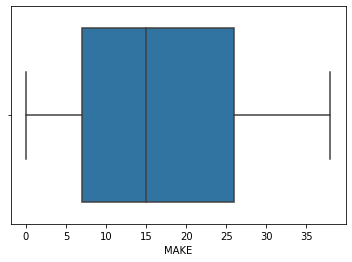

In [9]:
sns.boxplot(x=df['MAKE'])

In [10]:
df.MODEL.value_counts()

F150 FFV                 8
F150 FFV 4X4             8
ACCORD                   6
FOCUS FFV                6
BEETLE                   6
                        ..
Q50 AWD                  1
Q50                      1
SONATA HYBRID LIMITED    1
SONATA HYBRID            1
XC90 AWD                 1
Name: MODEL, Length: 663, dtype: int64

In [11]:
df.drop('MODEL',axis=1,inplace=True)

In [12]:
df.VEHICLECLASS.value_counts()

MID-SIZE                    178
COMPACT                     172
SUV - SMALL                 154
SUV - STANDARD              110
FULL-SIZE                    86
TWO-SEATER                   71
SUBCOMPACT                   65
PICKUP TRUCK - STANDARD      62
MINICOMPACT                  47
STATION WAGON - SMALL        36
VAN - PASSENGER              25
VAN - CARGO                  22
MINIVAN                      14
PICKUP TRUCK - SMALL         12
SPECIAL PURPOSE VEHICLE       7
STATION WAGON - MID-SIZE      6
Name: VEHICLECLASS, dtype: int64

In [13]:
df['VEHICLECLASS']=le.fit_transform(df['VEHICLECLASS'])

<AxesSubplot:xlabel='VEHICLECLASS'>

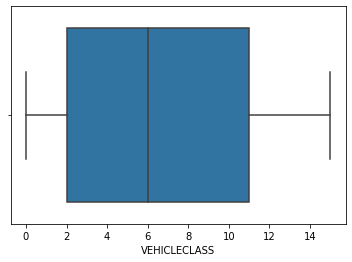

In [14]:
sns.boxplot(x=df['VEHICLECLASS'])

<AxesSubplot:xlabel='ENGINESIZE'>

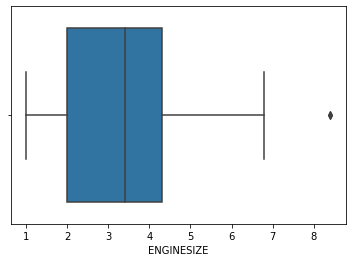

In [15]:
sns.boxplot(x=df['ENGINESIZE'])

In [16]:
def remove_outliers(df,x):
    #set limits
    q25,q75=np.percentile(df[x],25),np.percentile(df[x],75)
    iqr=q75-q25
    cut_off=iqr*1.5
    lower,upper=1,(q75+cut_off)
    df=df[(df[x]<upper)&(df[x]>lower)]
    print('outliers of "{}" are removed\n'.format(x))
    return df

In [17]:
df=remove_outliers(df,'ENGINESIZE')

outliers of "ENGINESIZE" are removed



<AxesSubplot:xlabel='ENGINESIZE'>

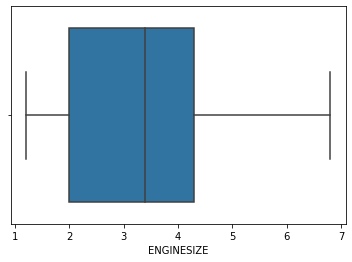

In [18]:
sns.boxplot(x=df['ENGINESIZE'])

In [19]:
df.CYLINDERS.value_counts()

4     419
6     356
8     252
12     17
5       9
10      7
3       2
Name: CYLINDERS, dtype: int64

<AxesSubplot:xlabel='CYLINDERS'>

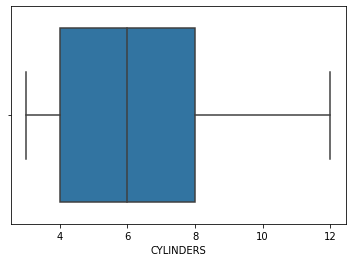

In [20]:
sns.boxplot(x=df['CYLINDERS'])

In [21]:
df.TRANSMISSION.value_counts()

A6     222
AS6    189
M6     139
A8      87
AS8     80
AS7     76
M5      47
AV      46
A4      45
AM7     34
A5      30
A7      12
AV6     11
AS5     10
M7       9
A9       8
AM6      6
AV7      5
AV8      3
AS9      2
AS4      1
Name: TRANSMISSION, dtype: int64

In [22]:
df['TRANSMISSION']=le.fit_transform(df['TRANSMISSION'])

<AxesSubplot:xlabel='TRANSMISSION'>

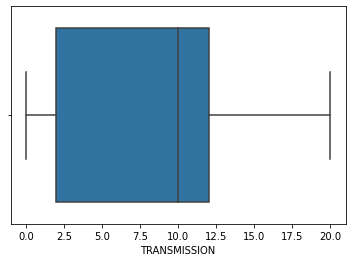

In [23]:
sns.boxplot(x=df['TRANSMISSION'])

In [24]:
df.FUELTYPE.value_counts()

X    513
Z    430
E     92
D     27
Name: FUELTYPE, dtype: int64

In [25]:
df['FUELTYPE']=le.fit_transform(df['FUELTYPE'])

<AxesSubplot:xlabel='FUELTYPE'>

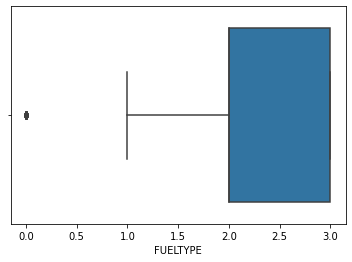

In [26]:
sns.boxplot(x=df['FUELTYPE'])

In [27]:
df=remove_outliers(df,'FUELTYPE')

outliers of "FUELTYPE" are removed



<AxesSubplot:xlabel='FUELTYPE'>

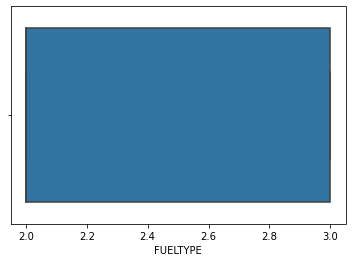

In [28]:
sns.boxplot(x=df['FUELTYPE'])

In [29]:
df.FUELCONSUMPTION_CITY.value_counts()

13.7    20
9.1     19
9.3     17
8.7     17
9.6     16
        ..
20.4     1
20.1     1
23.9     1
19.3     1
13.8     1
Name: FUELCONSUMPTION_CITY, Length: 140, dtype: int64

<AxesSubplot:xlabel='FUELCONSUMPTION_CITY'>

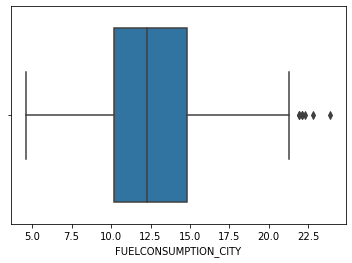

In [30]:
sns.boxplot(x=df['FUELCONSUMPTION_CITY'])

In [31]:
df=remove_outliers(df,'FUELCONSUMPTION_CITY')

outliers of "FUELCONSUMPTION_CITY" are removed



<AxesSubplot:xlabel='FUELCONSUMPTION_CITY'>

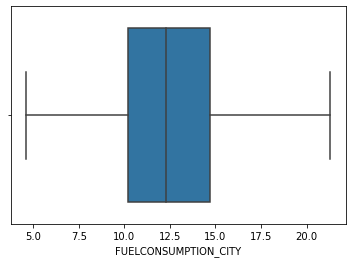

In [32]:
sns.boxplot(x=df['FUELCONSUMPTION_CITY'])

In [33]:
df.columns

Index(['MAKE', 'VEHICLECLASS', 'ENGINESIZE', 'CYLINDERS', 'TRANSMISSION',
       'FUELTYPE', 'FUELCONSUMPTION_CITY', 'FUELCONSUMPTION_HWY',
       'FUELCONSUMPTION_COMB', 'FUELCONSUMPTION_COMB_MPG', 'CO2EMISSIONS'],
      dtype='object')

In [34]:
df.FUELCONSUMPTION_HWY.value_counts()

8.6     30
7.9     27
8.7     25
7.0     25
6.7     24
        ..
10.8     1
15.0     1
5.4      1
12.0     1
5.2      1
Name: FUELCONSUMPTION_HWY, Length: 93, dtype: int64

<AxesSubplot:xlabel='FUELCONSUMPTION_HWY'>

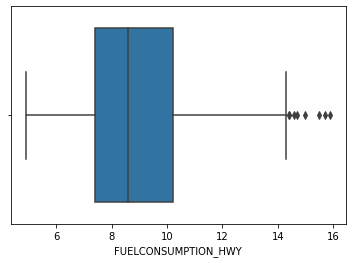

In [35]:
sns.boxplot(x=df['FUELCONSUMPTION_HWY'])

In [36]:
df=remove_outliers(df,'FUELCONSUMPTION_HWY')

outliers of "FUELCONSUMPTION_HWY" are removed



<AxesSubplot:xlabel='FUELCONSUMPTION_HWY'>

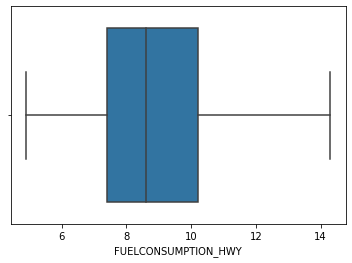

In [37]:
sns.boxplot(x=df['FUELCONSUMPTION_HWY'])

In [38]:
df.FUELCONSUMPTION_COMB_MPG.value_counts()

25    72
22    70
29    58
27    50
26    50
28    48
24    47
31    47
23    45
34    39
20    36
21    35
19    34
33    33
18    33
30    32
32    31
17    28
36    27
35    25
37    22
39    13
16    10
40     9
38     7
41     5
47     4
45     3
42     2
51     2
59     2
46     2
50     2
48     1
44     1
43     1
60     1
52     1
Name: FUELCONSUMPTION_COMB_MPG, dtype: int64

<AxesSubplot:xlabel='FUELCONSUMPTION_COMB_MPG'>

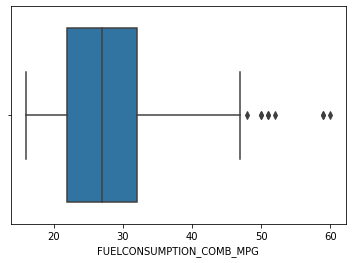

In [39]:
sns.boxplot(x=df['FUELCONSUMPTION_COMB_MPG'])

In [40]:
df=remove_outliers(df,'FUELCONSUMPTION_COMB_MPG')

outliers of "FUELCONSUMPTION_COMB_MPG" are removed



<AxesSubplot:xlabel='FUELCONSUMPTION_COMB_MPG'>

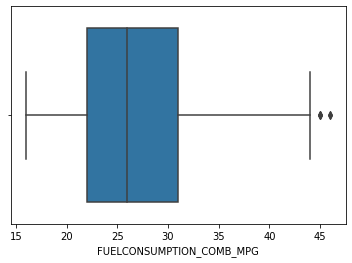

In [41]:
sns.boxplot(x=df['FUELCONSUMPTION_COMB_MPG'])

In [42]:
df.head()

,MAKE,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,0,0,2.0,4,9,3,9.9,6.7,8.5,33,196
1,0,0,2.4,4,19,3,11.2,7.7,9.6,29,221
3,0,11,3.5,6,10,3,12.7,9.1,11.1,25,255
4,0,11,3.5,6,10,3,12.1,8.7,10.6,27,244
5,0,2,3.5,6,10,3,11.9,7.7,10.0,28,230


### Plotting correlation heatmap

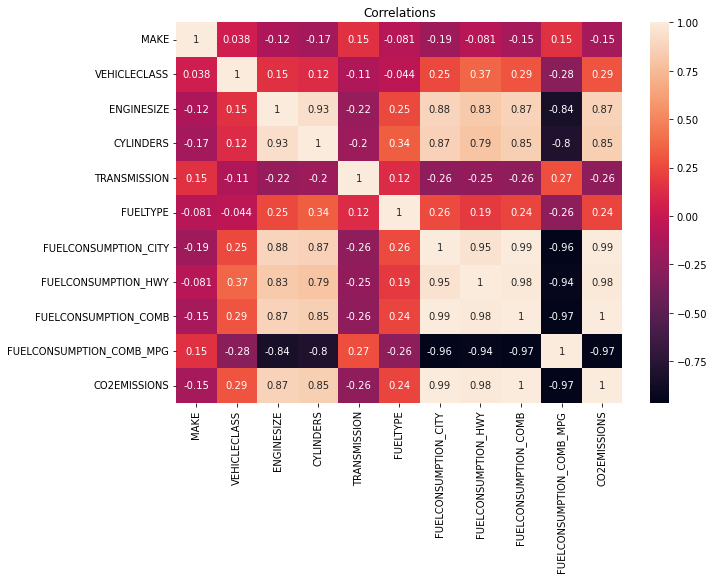

In [43]:
plt.figure(figsize=(10,7))
sns.heatmap(df.corr(),annot=True)
plt.title('Correlations')
plt.show()

### Dropping columns having less correlation with dependant variables

In [44]:
df.drop(['MAKE','TRANSMISSION','FUELCONSUMPTION_COMB_MPG'],axis=1,inplace=True)

### Separating dependant and independant variables

In [45]:
X=df.drop('CO2EMISSIONS',axis=1)
y=df.CO2EMISSIONS

In [46]:
X.head()

,VEHICLECLASS,ENGINESIZE,CYLINDERS,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB
0,0,2.0,4,3,9.9,6.7,8.5
1,0,2.4,4,3,11.2,7.7,9.6
3,11,3.5,6,3,12.7,9.1,11.1
4,11,3.5,6,3,12.1,8.7,10.6
5,2,3.5,6,3,11.9,7.7,10.0


In [47]:
y.head()

0    196
1    221
3    255
4    244
5    230
Name: CO2EMISSIONS, dtype: int64

### Performing train-test-split

In [48]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

### Fature scaling

In [49]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.fit_transform(X_test)

### Using linear regression

In [50]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(X_train,y_train)
y_hat=lr.predict(X_test)

In [51]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_hat,y_test)

1.3761581996969847

### USing ridge regression

In [52]:
from sklearn.linear_model import Ridge
Ridge=Ridge(alpha=1)

In [53]:
Ridge.fit(X_train,y_train)
y_hat1=Ridge.predict(X_test)

In [54]:
mean_squared_error(y_hat1,y_test)

1.191284407969053

### Using lasso regression

In [55]:
from sklearn.linear_model import Lasso
Lasso=Lasso(alpha=1)
Lasso.fit(X_train,y_train)
y_hat2=Lasso.predict(X_test)

c:\python39\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 429.06226452065744, tolerance: 250.42662568306002
  model = cd_fast.enet_coordinate_descent(


In [56]:
mean_squared_error(y_hat2,y_test)

0.32955704304623235